# Data science and Business Analytics (GRIP March'22)

## Author: Muskan Saluja

## TASK 1: To predict the score of a student who studies for 9.25 hours a day

### 1) importing all required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 2) importing and visualising data

In [5]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data= pd.read_csv(url)
print('data imported successfully')
s_data

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting the data to observe a relationship

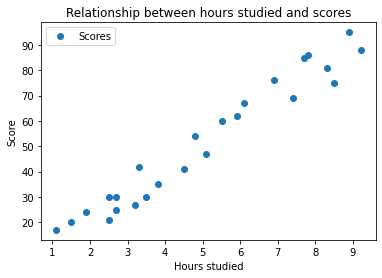

In [6]:
#using matplotlib library
s_data.plot(x='Hours',y='Scores', style='o')
plt.title('Relationship between hours studied and scores')
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

### There appears to be a positive relationship between hours studied and score

### 4) Preparing data

In [7]:
# dividing data into test and train dataset
# using test_train_split from scikit-learn library

x= s_data.drop('Scores',axis=1)
y= s_data['Scores']

train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=123)

### 5) training the algorithm

In [8]:
#fitting 80% of data as training data into linear regression algorithm
lin= LinearRegression()
lin.fit(train_x,train_y)

print('fitting of training data into linear regression is complete!')

fitting of training data into linear regression is complete!


In [9]:
print('intercept={},\
slope coefficient={}'.format(lin.intercept_,lin.coef_))

intercept=2.6953889223457423,slope coefficient=[9.60171878]


In [10]:
#equation of line

line= lin.intercept_+lin.coef_*train_x

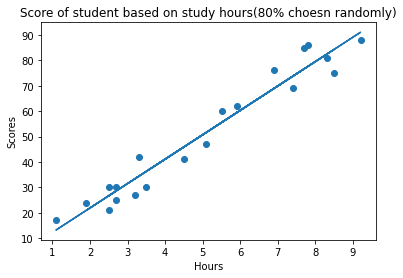

In [12]:
#plotting with regression line now

plt.scatter(train_x,train_y)
plt.plot(train_x,line)
plt.title('Score of student based on study hours(80% choesn randomly)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

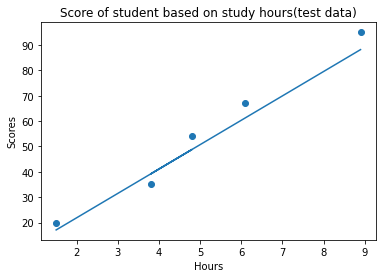

In [18]:
#regression for test data

line2= line= lin.intercept_+lin.coef_*test_x

plt.scatter(test_x,test_y)
plt.plot(test_x,line)
plt.title('Score of student based on study hours(test data)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### 6) projection of scores

In [19]:
print(test_x)
pred_y=lin.predict(test_x)

    Hours
5     1.5
21    4.8
22    3.8
18    6.1
15    8.9


In [22]:
#comparing actual scores with predictions

s_data_compare=pd.DataFrame({'Actual': test_y,'Predicted': pred_y})

s_data_compare

,Actual,Predicted
5,20,17.097967
21,54,48.783639
22,35,39.181920
18,67,61.265873
15,95,88.150686


In [24]:
#using 9.25 as a particular value and predicting score

hours=[9.25]
value=lin.predict([hours])

print('for no of hours {}, predicted score is {}'.format(hours, value))

for no of hours [9.25], predicted score is [91.51128762]


### 7) checking accuracy of model

In [26]:
print('mean_squared_error={}, r2 score={}'.format(mean_squared_error(test_y,pred_y),r2_score(test_y,pred_y)))

mean_squared_error=26.582796488881087, r2 score=0.9605221627526419


### So the R2 value is 0.96 which implies 96% of variation in average score of a student is explained by hours studied


### TASK 1: COMPLETE